## Programming for Data Analysis Project Notebook 2020 - Killian Foley
### Problem Statement
As a manufacturing engineer at electric motor manufacturing company "Bratwurst Motors" I have been tasked with performing a tolerance stackup analysis, on a linear assembly of multiple parts using the Monte Carlo simulation method. The use of tolerancing is very important in the mechanical design process because it affects product quality and manufacturing cost. [1] From Wikipedia [2] Tolerance analysis is described as "the general term given to describe the study of accumulated variation in mechanical parts and assemblies". Tolerance stackup is a process used in mechanical engineering for calculating the effects of the accumulated variation that is allowed by specified dimensions and tolerances provided on manufacturing drawings.


#### Variables Explained
Is the hole within tolerance = "accepted" (True or False)  
Drill bit starting diameter in mm = "drill_diameter" (mm)  
Number of cycles of drill bit = "cycles" (unit less number)  
Hole diameter = "hole_diameter" = (mm)

In [1]:
#start by importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# set Numpy precision to 3 decimal places due to practical measurement accuracies
np.set_printoptions(precision=3)
pd.set_option('precision', 3)

#setting the random generator so results can be reproduced

from numpy.random import default_rng
rg = default_rng(135792468)

#Generating drill diameter data
drill_diameter = rg.uniform(6.8,6.815,100) #simulate drill diamaters using normal distribution
drill_diameter

array([6.809, 6.813, 6.805, 6.803, 6.81 , 6.808, 6.809, 6.803, 6.813,
       6.814, 6.808, 6.805, 6.803, 6.814, 6.8  , 6.809, 6.803, 6.813,
       6.808, 6.814, 6.811, 6.802, 6.815, 6.806, 6.805, 6.815, 6.802,
       6.812, 6.805, 6.804, 6.8  , 6.801, 6.813, 6.812, 6.812, 6.812,
       6.804, 6.814, 6.814, 6.808, 6.808, 6.809, 6.807, 6.811, 6.808,
       6.813, 6.809, 6.803, 6.803, 6.813, 6.813, 6.804, 6.808, 6.809,
       6.806, 6.806, 6.8  , 6.814, 6.813, 6.813, 6.811, 6.812, 6.811,
       6.801, 6.815, 6.805, 6.807, 6.803, 6.815, 6.807, 6.808, 6.802,
       6.809, 6.809, 6.814, 6.811, 6.812, 6.801, 6.811, 6.806, 6.813,
       6.804, 6.801, 6.812, 6.807, 6.805, 6.804, 6.803, 6.811, 6.803,
       6.801, 6.811, 6.803, 6.813, 6.805, 6.804, 6.813, 6.808, 6.806,
       6.811])

As the manufacturing facilty employs Six Sigma techniques the manufacturing yield will be designed to these paramters that is the upper and lower limits will be +3 and -3 standard deviations respectively with the distribution centred around the halfway point.  
https://en.wikipedia.org/wiki/Six_Sigma

In [2]:
mu, sigma = 6.8075, 0.0025 # create variables mean and standard deviation
hole_diameter = rg.normal(mu, sigma, 100) # simulate hole diameter variable using normal distribution
hole_diameter

array([6.802, 6.809, 6.808, 6.808, 6.806, 6.811, 6.805, 6.804, 6.807,
       6.808, 6.805, 6.804, 6.804, 6.811, 6.802, 6.807, 6.808, 6.807,
       6.811, 6.807, 6.81 , 6.808, 6.802, 6.807, 6.803, 6.809, 6.81 ,
       6.805, 6.809, 6.81 , 6.811, 6.809, 6.807, 6.809, 6.806, 6.805,
       6.806, 6.807, 6.81 , 6.811, 6.807, 6.804, 6.81 , 6.811, 6.806,
       6.809, 6.807, 6.808, 6.807, 6.811, 6.809, 6.807, 6.804, 6.808,
       6.806, 6.805, 6.808, 6.808, 6.809, 6.809, 6.807, 6.804, 6.804,
       6.81 , 6.806, 6.803, 6.804, 6.806, 6.802, 6.809, 6.807, 6.807,
       6.807, 6.804, 6.812, 6.804, 6.813, 6.806, 6.808, 6.809, 6.807,
       6.81 , 6.807, 6.813, 6.806, 6.808, 6.807, 6.808, 6.808, 6.807,
       6.806, 6.809, 6.813, 6.808, 6.809, 6.813, 6.807, 6.81 , 6.809,
       6.803])

Cycles - after consulting the manufacturer and observing similar processes already in production it is estimated that number of cycles will range from 15-30 likely depending on the starting diameter of the drill bit.  
reference: https://www.sandvik.coromant.com/en-us/knowledge/machining-formulas-definitions/pages/drilling.aspx

In [3]:
cycles = rg.integers(15,30,100)
cycles

array([24, 17, 23, 19, 21, 23, 22, 25, 29, 23, 25, 21, 20, 18, 25, 18, 26,
       21, 28, 22, 29, 17, 29, 26, 26, 28, 24, 27, 28, 24, 28, 28, 29, 15,
       17, 24, 18, 27, 26, 16, 23, 15, 22, 17, 25, 15, 24, 29, 22, 15, 25,
       28, 26, 15, 22, 29, 28, 23, 17, 15, 29, 18, 28, 19, 18, 23, 28, 25,
       20, 18, 22, 15, 16, 18, 24, 23, 17, 29, 28, 25, 20, 25, 23, 22, 28,
       17, 29, 25, 23, 17, 21, 23, 26, 15, 15, 19, 22, 15, 15, 28])

As we are implementing Six Sigma techniques we should expect 3.4 defects per million 

In [4]:
outcome = [True, False]
accepted = rg.choice(outcome, 100, p=[0.999999966,3.4E-8])
accepted

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Create a Pandas Dataframe from dictionary. [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html].

In [5]:
d = {'DrillDiameter': drill_diameter, 'HoleDiameter': hole_diameter, 'DrillbitCycles': cycles, 'QAAccepted': accepted}
df = pd.DataFrame(data=d)
df

,DrillDiameter,HoleDiameter,DrillbitCycles,QAAccepted
0,6.809,6.802,24,True
1,6.813,6.809,17,True
2,6.805,6.808,23,True
3,6.803,6.808,19,True
4,6.810,6.806,21,True
...,...,...,...,...
95,6.804,6.813,19,True
96,6.813,6.807,22,True
97,6.808,6.810,15,True
98,6.806,6.809,15,True


In [6]:
df.describe() #Outputs a summary of each numerical column

,DrillDiameter,HoleDiameter,DrillbitCycles
count,100.000,100.000,100.000
mean,6.808,6.807,22.420
std,0.004,0.003,4.586
min,6.800,6.802,15.000
25%,6.804,6.806,18.000
50%,6.808,6.807,23.000
75%,6.812,6.809,26.000
max,6.815,6.813,29.000


In [7]:
df.describe(include='all') #Outputs a summary of all columns

,DrillDiameter,HoleDiameter,DrillbitCycles,QAAccepted
count,100.000,100.000,100.000,100
unique,NaN,NaN,NaN,1
top,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,100
mean,6.808,6.807,22.420,NaN
std,0.004,0.003,4.586,NaN
min,6.800,6.802,15.000,NaN
25%,6.804,6.806,18.000,NaN
50%,6.808,6.807,23.000,NaN
75%,6.812,6.809,26.000,NaN


In [9]:
#create a new dataframe excluding QAAccepted column as it is non numeric 
df1 = df[["DrillDiameter", "HoleDiameter", "DrillbitCycles"]]
df1

,DrillDiameter,HoleDiameter,DrillbitCycles
0,6.809,6.802,24
1,6.813,6.809,17
2,6.805,6.808,23
3,6.803,6.808,19
4,6.810,6.806,21
...,...,...,...
95,6.804,6.813,19
96,6.813,6.807,22
97,6.808,6.810,15
98,6.806,6.809,15


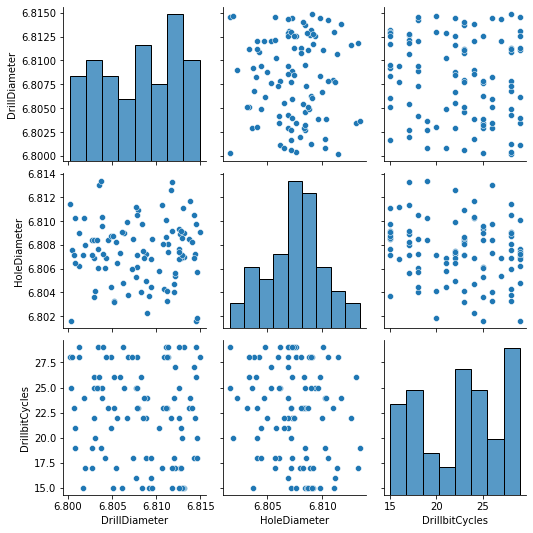

In [10]:
sns.pairplot(df1)

In [ ]:
count, bins, ignored = plt.hist(hole_diameter, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

#### References
[1] Design Society Publication; pdf in repo <br />
[2] Tolerance Analysis wiki; https://en.wikipedia.org/wiki/Tolerance_analysis <br />




Links
https://www.engineeringtoolbox.com/metric-threads-d_777.html
https://www.engineersedge.com/international_tol.htm
https://www.maford.com/SiteContent/Documents//2018_catalog_sections//MAFord_2018_Master_Catalog_HP_Drill_%20Selection_Chart.pdf